In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/AI_Assignment/Assignment2

/content/drive/MyDrive/AI_Assignment/Assignment2


In [3]:
#import necessary libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

In [4]:
# Load the data
df=pd.read_csv('IRIS.csv')

In [5]:
#view 5 top rows of data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#view 5 bottom rows of data
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Find null columns
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
print("The different Species in the dataset are:", df['species'].unique())
print("The total number of unique species are:", df['species'].nunique())

The different Species in the dataset are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The total number of unique species are: 3


**EDA**

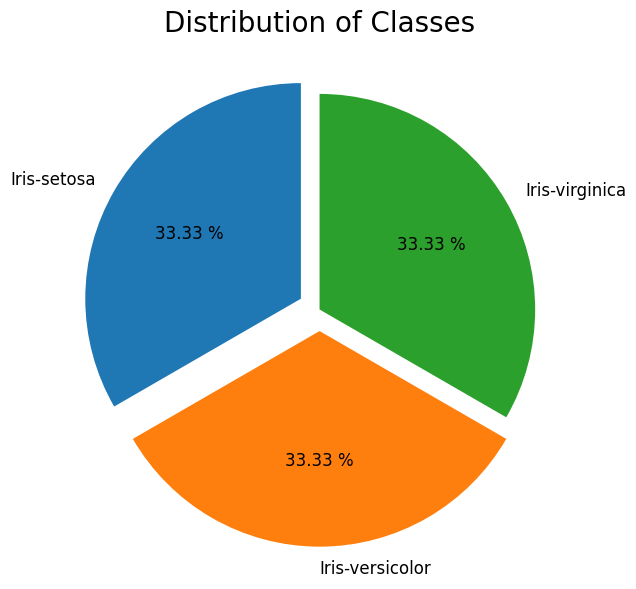

In [11]:
count_list = [(df.species == 'Iris-setosa').sum(), (df.species == 'Iris-versicolor').sum(), (df.species == 'Iris-virginica').sum()]
label_list = list(df['species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

In [12]:
print("The distribution of the classes is:\n", df['species'].value_counts(), sep = "")

The distribution of the classes is:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


<ipython-input-13-1d34181d60a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)


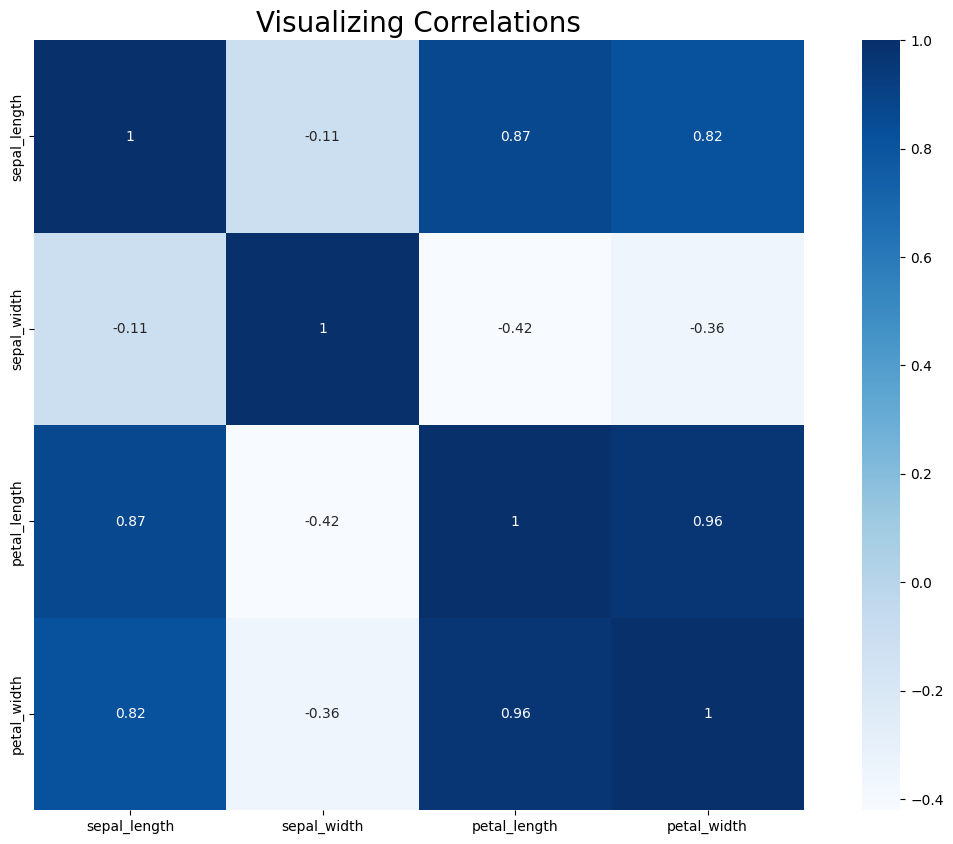

In [13]:
# checking correlations
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

In [14]:
X = df.drop(['species'], axis = 1)
y = df['species']
print(X, "\n\n", y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 

 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: 

In [15]:
#First label encode for species
# Manually label encode
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
print(df.head())
print(df.tail())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
     sepal_length  sepal_width  petal_length  petal_width  species
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2


In [16]:
# Define Dependent Variables and Independent variable
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

In [17]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [21]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [22]:
# Print the shape of splitted data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [23]:
# classification report
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()

**Perceptron**

The accuracy for perceptron is: 76.66666666666667 %

The classification report for Perceptron Classifier is:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.30      0.46        10
           2       0.83      1.00      0.91        10

    accuracy                           0.77        30
   macro avg       0.83      0.77      0.72        30
weighted avg       0.83      0.77      0.72        30



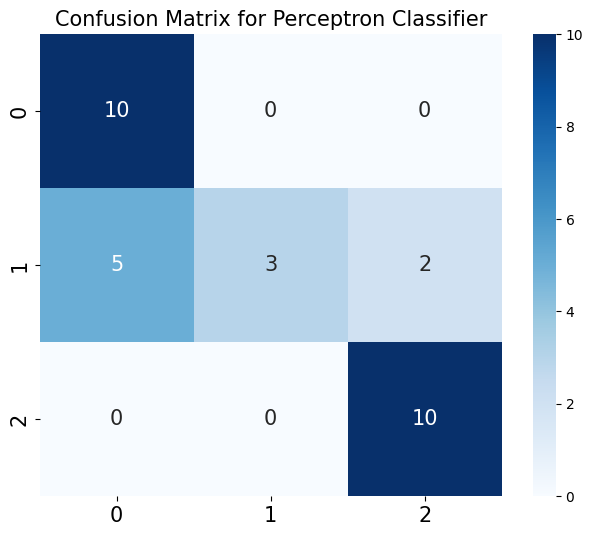

In [24]:
ppn = Perceptron()
ppn.fit(X_train, y_train)
y_pred_ppn = ppn.predict(X_test)
acc_ppn = ppn.score(X_test, y_test)
print('The accuracy for perceptron is:', acc_ppn * 100, '%')
generate_results(ppn, y_pred_ppn, 'Perceptron Classifier')

**Logistic Regression**

The accuracy for Logistic Regression is: 100.0 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



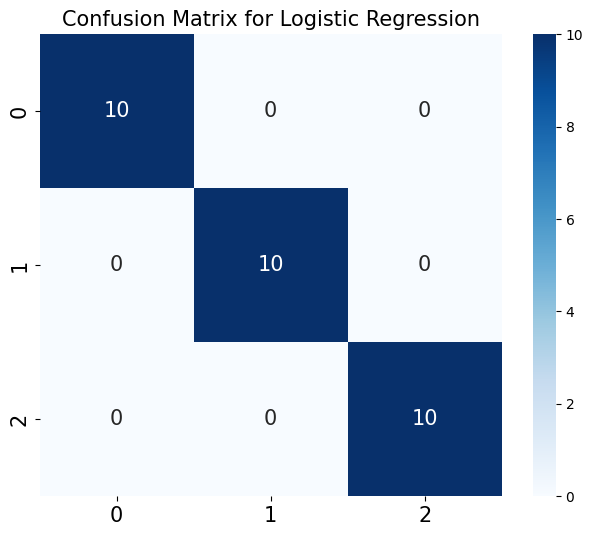

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
generate_results(lr, y_pred_lr, 'Logistic Regression')

**Support Vector Machine**

The accuracy for SVM is: 100.0 %

The classification report for Support Vector Machine Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



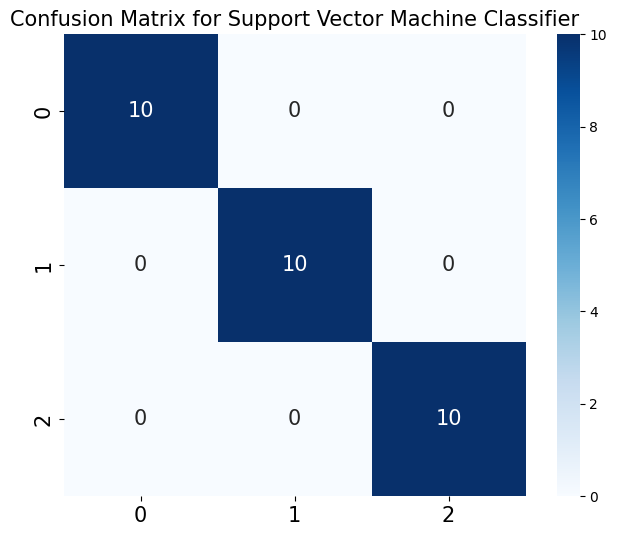

In [26]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = svm.score(X_test, y_test)
print('The accuracy for SVM is:', acc_svm * 100, '%')
generate_results(svm, y_pred_svm, 'Support Vector Machine Classifier')

**Model Evaluation with Root Mean Squared Error (RMSE)**

In [27]:
from sklearn.metrics import mean_squared_error

rmse_ppn = np.sqrt(mean_squared_error(y_test, y_pred_ppn))
print("RMSE of Perceptron",rmse_ppn)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE of Logistic Regression",rmse_lr)

rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print("RMSE of SVM",rmse_svm)

RMSE of Perceptron 0.48304589153964794
RMSE of Logistic Regression 0.0
RMSE of SVM 0.0


**Model Evaluation visualization**

In [28]:
accuracy = {"Perceptron":acc_ppn,"Logistic":acc_lr,"SVM":acc_svm}
rmse = {"Perceptron":rmse_ppn,"Logistic":rmse_lr,"SVM":rmse_svm}

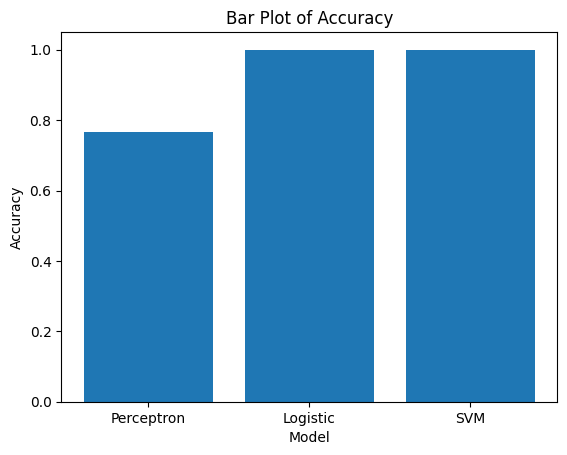

In [29]:
labels = list(accuracy.keys())
values = list(accuracy.values())

# Create a bar plot
plt.bar(labels, values)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Bar Plot of Accuracy')

# Show the plot
plt.show()

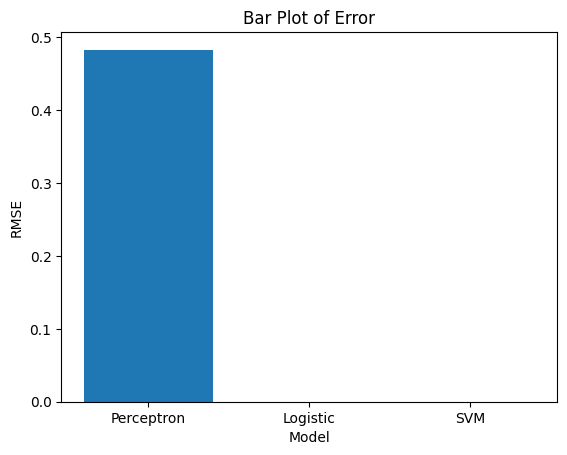

In [30]:
labels = list(rmse.keys())
values = list(rmse.values())

# Create a bar plot
plt.bar(labels, values)

# Set labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Bar Plot of Error')

# Show the plot
plt.show()

**Save the Model**

In [32]:
# Import Joblib Module from Scikit Learn

import joblib
# Save RL_Model to file in the current working directory

joblib_file = "iris_LR_model.pkl"
joblib.dump(lr, joblib_file)

['iris_LR_model.pkl']

In [33]:
iris_lr_model = joblib.load("iris_LR_model.pkl")

iris_lr_model

LogisticRegression()

In [34]:
# Test data input
sepal_length = (float)(input("Input sepal length: "))
sepal_width = (float)(input("Input sepal width: "))
petal_length = (float)(input("Input petal length: "))
petal_width = (float)(input("Input petal width: "))

data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Predict the class for the input data
result = iris_lr_model.predict(data)

print("------------------------")
if result == 0:
    print("Iris-setosa")
elif result == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

print("------------------------")

Input sepal length: 5
Input sepal width: 3
Input petal length: 1.4
Input petal width: 0.2
------------------------
Iris-setosa
------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
